<a href="https://colab.research.google.com/github/ivaibhavi17/Machine-Learning/blob/main/02_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Binary **classification**

In [32]:
dict1={
    "age":[22,25,47,52,46,56,55,60,62,61,18,28,27,29,49],
    "have_insurance":[0,0,1,0,1,1,0,1,1,1,0,0,0,0,1]
}
df=pd.DataFrame(dict1)
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


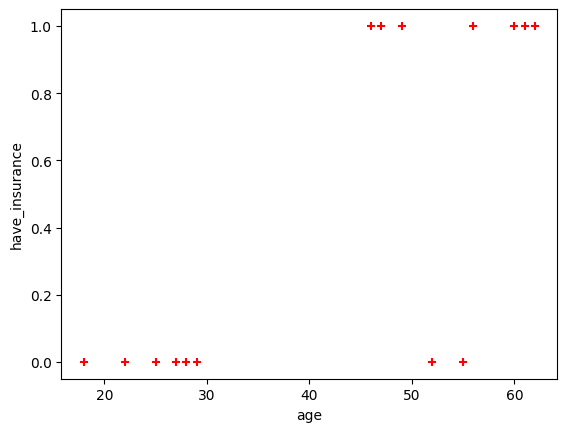

In [33]:
plt.scatter(df.age,df.have_insurance,color="red",marker="+")
plt.xlabel("age")
plt.ylabel("have_insurance")
plt.show()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.have_insurance,test_size=0.1)

In [16]:
x_test

,age
12,27
6,55


In [21]:
x_train


,age
12,27
1,25
4,46
7,60
10,18
14,49
11,28
6,55
3,52
0,22


In [23]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
model.predict(x_test)

array([1, 0])

In [30]:
model.score(x_test,y_test)

0.5

In [34]:
model.predict_proba(x_test)

array([[0.10385812, 0.89614188],
       [0.55165506, 0.44834494]])

Multiclass **classification**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [40]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

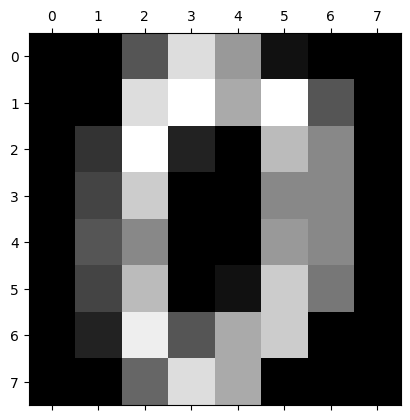

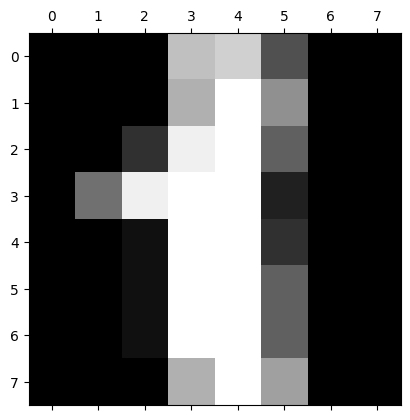

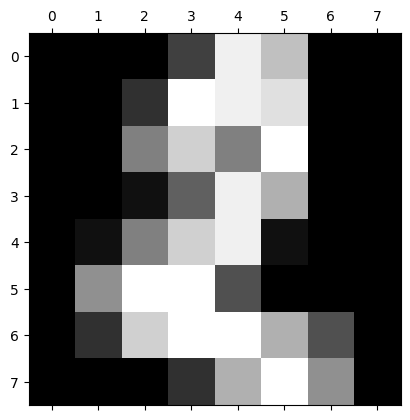

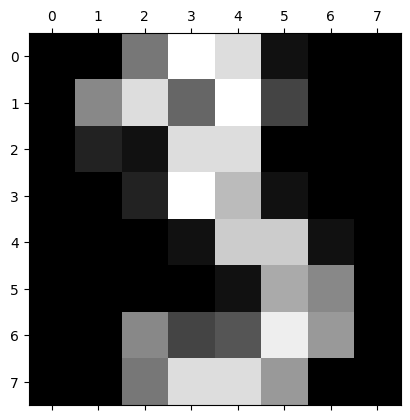

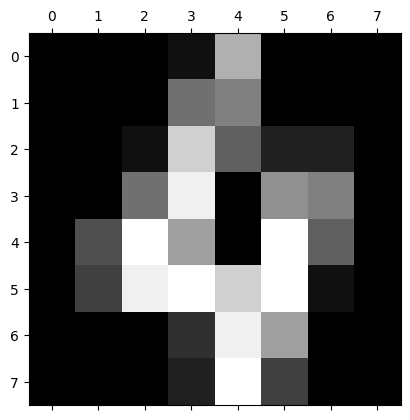

In [45]:
plt.gray()
for i in range(5):
      plt.matshow(digits.images[i])




In [49]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [52]:
len(x_train)

1437

In [54]:
len(x_test)

360

In [56]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
model.score(x_test,y_test)

0.9694444444444444

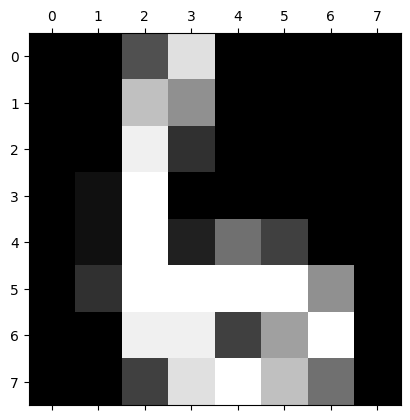

In [61]:
plt.matshow(digits.images[67])

In [63]:
digits.target[67]

np.int64(6)

In [69]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [71]:
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(x_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

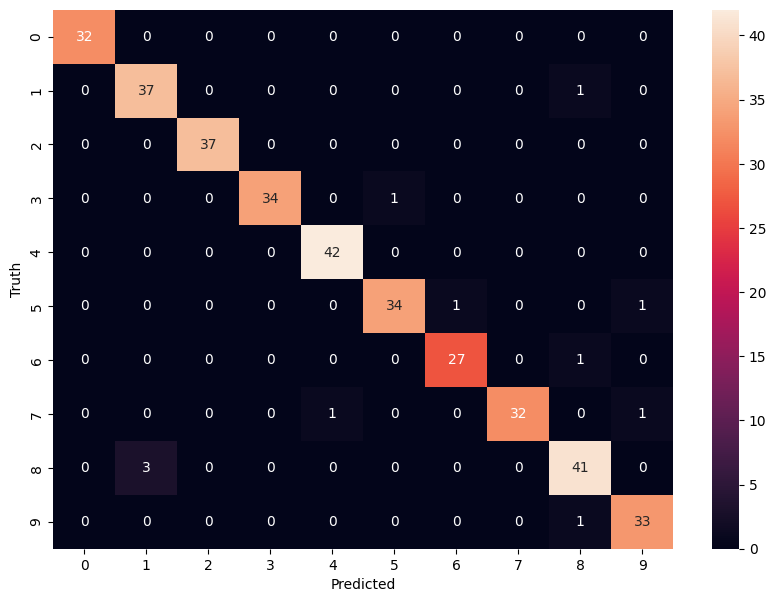

In [73]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
